## Shipment and delivery delay analysis


Let's explore the **orders** and **order_items** datasets to verify the efficiency of the shipment and delivery of the platform by answering the following questions:

1. How many orders were shipped with delay?
2. What are the regions with most delays?
3. Are there any seller with high delay rate?
4. How many orders were delivered with delay?
5. How shipping delay impacts delivery performance?
6. Are there any relation between delivery delay and the distance between sellers and customers?
7. How does freight value behaves among states?
8. Conclusions

# 1. How many orders were shipped with delay?

Let's begin with the order shipment efficiency. To do so, we will consider all orders that have a date of delivering to a carrier (represented by the column "order_delivered_carrier_date").

In [1]:
import os
import pandas as pd
import mysql.connector as mysql
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from credentials import login_config, path_dir

In [3]:
# Adjusting the working directory to better manage the file calls
os.chdir(path_dir)

/home/hbeltrao/Hugo/Projects/Olist-EDA-Project


In [9]:
# Report information with order dispatching efficiency per month

# Creating a connection to the MySQL Database
connection = mysql.connect(**login_config)

# parsing the period of evaluation
period = ('2016-01-01 00:00:00', '2018-12-31 23:59:59')

# Loading the query
with open("2-Queries/1-Shipment_and_delivery/delayed_shipments_by_year_month.sql") as query:
    order_shipment_delay_raw = pd.read_sql_query(query.read(), params=period, con=connection)

order_shipment_delay_raw

/home/hbeltrao/Hugo/py_environments/data_env/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,year_months,Shipped_on_schedule,Shipped_with_delay,total_shipments,Delay_Percentage,Average_Delay,Average_Shipping_time,Average_Shipping_estimate
0,201610,167.0,129.0,296,43.58,7.909,11.421,8.214
1,201611,1.0,35.0,36,97.22,28.298,37.671,9.489
2,201612,1.0,1.0,2,50.00,58.592,33.051,4.109
3,201701,598.0,128.0,726,17.63,1.994,2.676,4.559
4,201702,1424.0,295.0,1719,17.16,3.629,3.206,5.196
5,201703,2813.0,292.0,3105,9.40,5.565,3.404,7.431
6,201704,2241.0,147.0,2388,6.16,4.181,3.400,7.992
7,201705,3848.0,331.0,4179,7.92,2.938,3.346,7.768
8,201706,3339.0,304.0,3643,8.34,2.792,3.170,7.027
9,201707,3871.0,329.0,4200,7.83,1.782,3.118,6.858


It is visible that the orders from 2016 and september-2018 had the biggest delays. Apart from those months, the rest of the period had a percentage of delayed orders inferior to 20%.

Another interesting point to take is the average delay in days. This data (calculated by the difference between the shipping date and the shipping limit) show that the months with most percentages of orders delayed also had the most delay in days.
Since this data are in the edges of the dataset and have low representation (0,35% of total orders) i will opt to truncate this data for the rest of the analysis.

In [10]:
# Recalling the query using the truncated period

period = ('2017-01-01 00:00:00', '2018-08-31 23:59:59')

# Loading the query
with open("2-Queries/1-Shipment_and_delivery/delayed_shipments_by_year_month.sql") as query:
    order_shipment_delay_per_year_month = pd.read_sql_query(query.read(), params=period, con=connection)

order_shipment_delay_per_year_month

/home/hbeltrao/Hugo/py_environments/data_env/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,year_months,Shipped_on_schedule,Shipped_with_delay,total_shipments,Delay_Percentage,Average_Delay,Average_Shipping_time,Average_Shipping_estimate
0,201701,598.0,128.0,726,17.63,1.994,2.676,4.559
1,201702,1424.0,295.0,1719,17.16,3.629,3.206,5.196
2,201703,2813.0,292.0,3105,9.40,5.565,3.404,7.431
3,201704,2241.0,147.0,2388,6.16,4.181,3.400,7.992
4,201705,3848.0,331.0,4179,7.92,2.938,3.346,7.768
5,201706,3339.0,304.0,3643,8.34,2.792,3.170,7.027
6,201707,3871.0,329.0,4200,7.83,1.782,3.118,6.858
7,201708,4582.0,376.0,4958,7.58,2.358,3.127,6.831
8,201709,4350.0,341.0,4691,7.27,2.508,3.191,7.012
9,201710,4821.0,392.0,5213,7.52,3.064,3.340,7.139


Now we can plot the graph of delays and average shipping times to use as KPIs for monitor the shipping performance

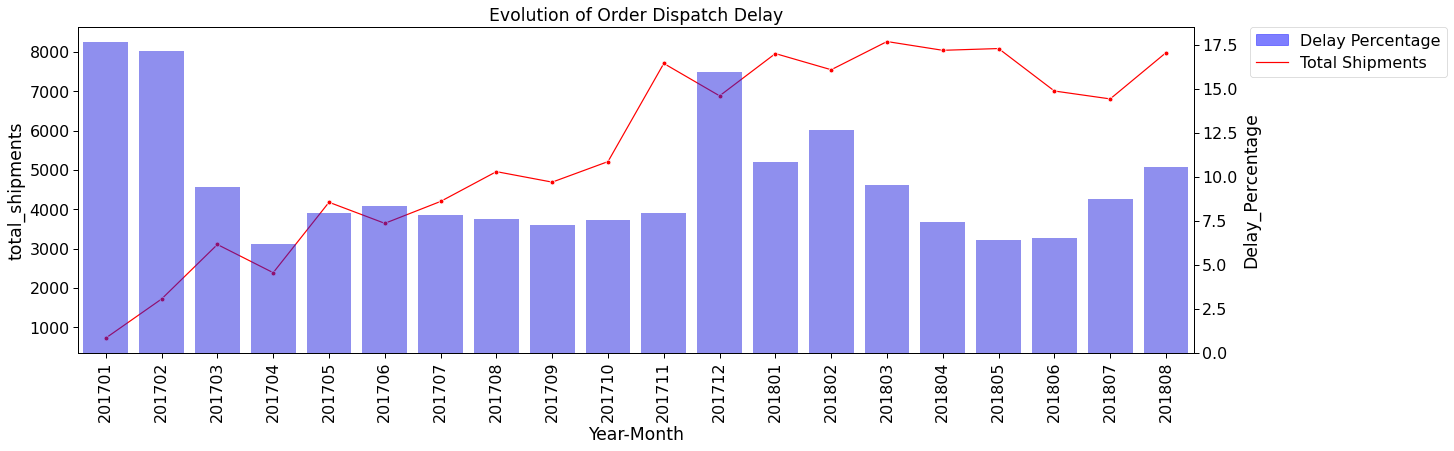

In [11]:
# Plotting the % of order with delay per month

sns.set_context('paper', font_scale=1.8)
fig, ax1 = plt.subplots(figsize=(20,6))

plt.xticks(rotation=90)
plt.xlabel('Year-Month')

sns.lineplot(data = order_shipment_delay_per_year_month['total_shipments'], marker='o', sort = False, ax=ax1, color='red', legend=False)
ax2 = ax1.twinx()

sns.barplot(data = order_shipment_delay_per_year_month, x='year_months', y='Delay_Percentage', alpha=0.5, ax=ax2, color='blue')

plt.title('Evolution of Order Dispatch Delay')

blue_patch = mpatches.Patch(color='b', alpha=0.5, label='Delay Percentage')
red_line = mlines.Line2D([], [], color='r', alpha=1, label='Total Shipments')
plt.legend(handles=[blue_patch, red_line], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The graph shows that, even with a continuous increase of shipment number alongside 2017 and stabilizing in 2018, the percentage of orders losing shipment deadlines didn't increase the same way (although it had months with spikes).
Part of the reason for this might be that the shipping process is decentralized and handled by the seller, not the platform.

The increase in December-2017 could be related to the black friday of that year, that concentrates sales on the end of November but most of these sales are processed and shipped in the beginning of December but all these assumptions need more information and a deeper analysis to be confirmed or discarded.

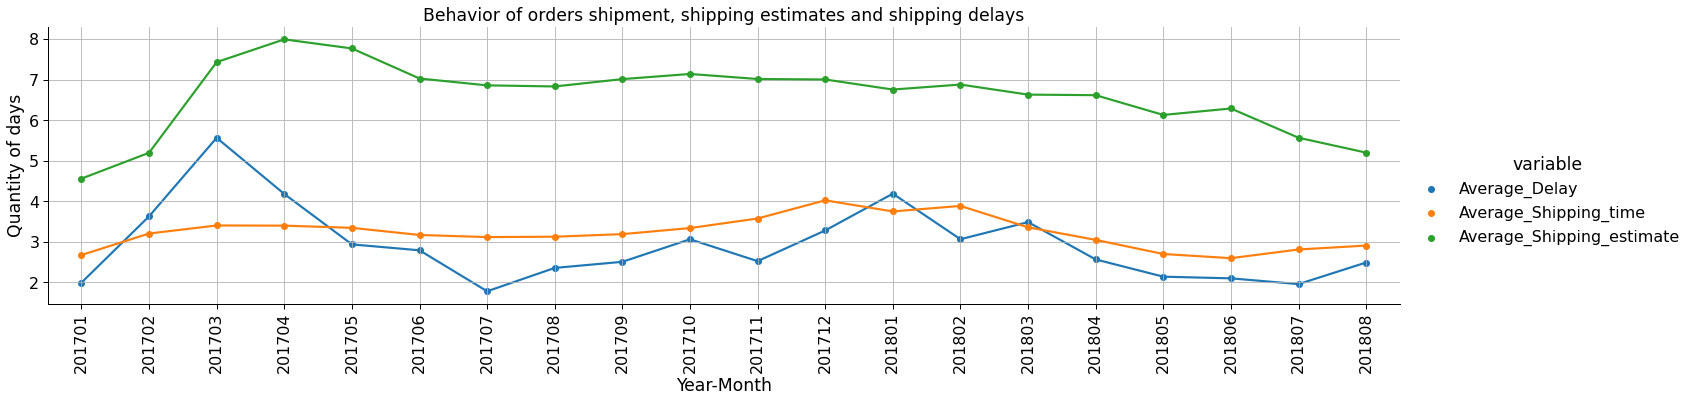

In [13]:
# Let's create a lineplot to visualize the trend of shippment delay and average dispatch times in days

order_shipment_delay_pivoted = pd.melt(order_shipment_delay_per_year_month, id_vars='year_months', value_vars=['Average_Delay', 'Average_Shipping_time', 'Average_Shipping_estimate'])

#sns.set_context('paper', font_scale=1.8)
sns.catplot(data=order_shipment_delay_pivoted, x='year_months', y='value', hue='variable', kind='point', aspect=4)
plt.grid()
plt.xticks(rotation=90)
plt.xlabel('Year-Month')
plt.ylabel('Quantity of days')
plt.title('Behavior of orders shipment, shipping estimates and shipping delays')
plt.show()


We can see that the shipping time is usually quite lower than the shipping limit but when an order is delayed, that delay is quite significant (delay is counted as the number of days passed the shipping limit.), reaching over 10 days to be shipped.

Now we need to investigate if these high delays are related to regions or seller specific.

# 2. What are the regions with most delays?


Let's break the shipping behavior by state to investigate possible delay patterns and causes.

In [14]:
# Fetching the order delay data aggregated by state

period = ('2017-01-01 00:00:00', '2018-08-31 23:59:59')

# Loading the query
with open("2-Queries/1-Shipment_and_delivery/delayed_shipments_by_state_total.sql") as query:
    order_shipment_delay_per_state = pd.read_sql_query(query.read(), params=period, con=connection)

order_shipment_delay_per_state

/home/hbeltrao/Hugo/py_environments/data_env/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,state,Shipped_on_schedule,Shipped_with_delay,total_shipments,Delay_Percentage,Average_Delay,Average_Shipping_time,Average_Shipping_estimate
0,SE,335.0,46.0,381,12.07,3.028,3.608,6.803
1,AL,383.0,52.0,435,11.95,3.267,3.601,6.799
2,PB,528.0,68.0,596,11.41,1.880,3.632,6.790
3,ES,2015.0,226.0,2241,10.08,2.702,3.431,6.683
4,MS,732.0,82.0,814,10.07,2.085,3.216,6.699
5,MA,729.0,81.0,810,10.00,4.097,3.753,7.193
6,PR,5108.0,550.0,5658,9.72,2.702,3.304,6.581
7,RJ,13035.0,1383.0,14418,9.59,3.225,3.348,6.648
8,RN,473.0,50.0,523,9.56,2.946,3.541,6.955
9,TO,284.0,30.0,314,9.55,2.167,3.476,6.937


In [15]:
# Transforming the data into long format to facilitate plotting with seaborn
order_shipment_delay_per_state_pivoted = pd.melt(order_shipment_delay_per_state, id_vars='state', value_vars=['Average_Delay', 'Average_Shipping_time', 'Average_Shipping_estimate'])

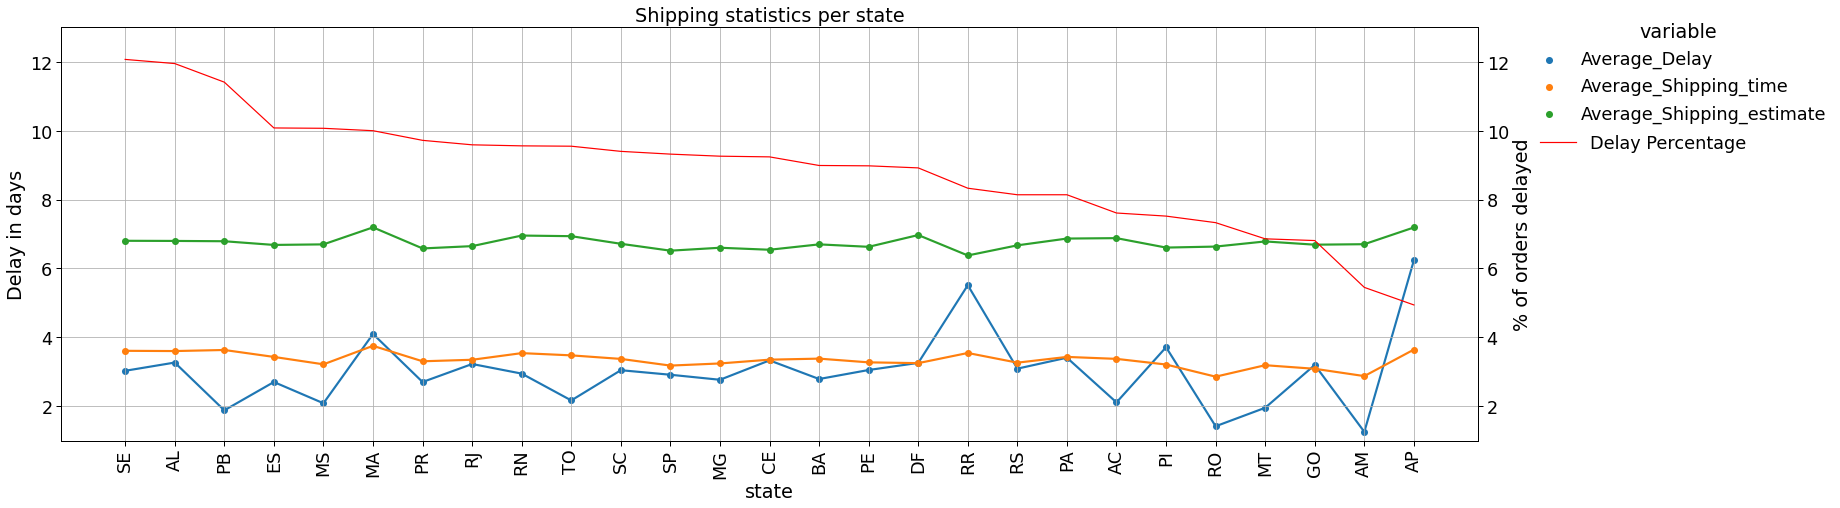

In [16]:
# Creating the plot of shipping delay per state
sns.set_context('paper', font_scale=2)

ax1 = sns.catplot(data=order_shipment_delay_per_state_pivoted, x='state', y='value', hue='variable', kind='point', height=7, aspect=3)
plt.grid()
plt.xticks(rotation=90)
ax2=ax1.ax.twinx()
sns.lineplot(data=order_shipment_delay_per_state, x='state', y='Delay_Percentage', color='red', ax=ax2, label='Delay Percentage')

ax2.set_ylim(1, 13)
ax1.ax.set_ylim(1,13)

ax1.ax.set_xlabel('state')
ax1.ax.set_ylabel('Delay in days')
ax2.set_ylabel('% of orders delayed')
plt.title('Shipping statistics per state')

sns.move_legend(ax1, 'upper right', bbox_to_anchor=(1.02, 1))
sns.move_legend(ax2, 'upper right', bbox_to_anchor=(1.2, 0.78), frameon=False)
plt.show()

Shipping limit and shipping time are almost flat and parallel lines, wich may indicate that the platform doesn't seem to account order origin to estimate the shipping date (Wich makes sense to guarantee that all orders are processed the same way.). 

But looking into delay percentage and average delay, the highest numbers are concentrated on north and northeast states. This could be related to distance between the seller and buyer or because these states have smaller volume of orders and thus more complex and inefficient freight logistics.

It is interesting to point that the states with highest delay percentages do not have the highest delays in days.

Next we will explore shipping performance per seller.

# 3. Are there any seller with high delay rate?

A deeper analysis of seller data will be done in another section, but for shipping evaluation, one factor have big impact, only 1% of the sellers are responsible for overt 25% of all items sold in the period. So in order to leverage the impact of those sellers, one way is to categorize them in 3 blocks,
big, medium and small sellers, and analyze each block.

Let's define:

*  Period of data = 2017-01-01 00:00:00 and 2018-08-31 23:59:59
*  Total number of sellers = 2.951 sellers
*  Total number of items sold = 111.120 items sold

| **Seller Type**   | **Classification  Rule in sales** | **Total Sellers** | **Sellers Representation (%)** | **Total Sales** | **Sale Representation (%)** | **sales with shipping delay'** | **delay_percentage** | **Average shipping delay** |
|-------------------|-----------------------------------|-------------------|--------------------------------|-----------------|-----------------------------|--------------------------------|----------------------|----------------------------|
| **Big Seller**    | Over 500 sales                    | 29                | 0.98%                          | 29,168          | 26.25%                      | 2,331                          | 7.99%                | 1.95                       |
| **Medium Seller** | Between 5 and 500 sales           | 1,832             | 62.08%                         | 79,757          | 71.78%                      | 7,643                          | 9.58%                | 3.17                       |
| **Smal Seller**   | less than 5 sales                 | 1,090             | 36.94%                         | 2,195           | 1.97%                       | 271                            | 12.35%               | 5.05                       |
|                   | total                             | 2,951             | 100.00%                        | 111,120         | 100.00%                     | 10,245                         | 9.21%                | 2.94                       |


In [23]:
# Querying seller statistics by seller classification

# Loading the query
with open("2-Queries/1-Shipment_and_delivery/Sellers_classification_by_items_sold.sql") as query:
    seller_category_table = pd.read_sql_query(query.read(), con=connection)

seller_category_table 

,seller_classification,total_sellers,seller_representation (%),total_sales,sales_representation (%),sales with shipping delay,delay_percentage,Average shipping delay
0,Big Seller,29,0.98,29168,26.25,2331.0,7.99,1.95
1,Medium Seller,1861,63.06,79847,71.86,7661.0,9.59,3.17
2,Small Seller,1061,35.95,2100,1.89,248.0,11.81,5.14


In [24]:
# Fetching the order delay data aggregated by seller

period = ('2017-01-01 00:00:00', '2018-08-31 23:59:59')

# Loading the query
with open("2-Queries/1-Shipment_and_delivery/delayed_shipments_by_seller_total.sql") as query:
    seller_data_with_category= pd.read_sql_query(query.read(), params=period, con=connection)
seller_data_with_category

/home/hbeltrao/Hugo/py_environments/data_env/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,year_months,seller,seller_state,seller_classification,orders_delayed,total_orders,delay_percentage,average_delay
0,201701,004c9cd9d87a3c30c522c48c4fc07416,SP,Medium Seller,0.0,5,0.00,NaN
1,201701,014c0679dd340a0e338872e7ec85666a,MG,Medium Seller,0.0,1,0.00,NaN
2,201701,01cf7e3d21494c41fb86034f2e714fa1,PR,Medium Seller,0.0,2,0.00,NaN
3,201701,054694fa03fe82cec4b7551487331d74,SP,Medium Seller,5.0,7,71.43,0.7250
4,201701,05ff92fedb5be47920fea08e501238b9,RS,Medium Seller,0.0,4,0.00,NaN
...,...,...,...,...,...,...,...,...
15965,201808,ff1fb4c404b2efe68b03350a8dc24122,SP,Medium Seller,5.0,7,71.43,4.2678
15966,201808,ffa6adafb71b807dc13159e26431354c,PR,Medium Seller,0.0,4,0.00,NaN
15967,201808,ffc470761de7d0232558ba5e786e57b7,SP,Medium Seller,0.0,6,0.00,NaN
15968,201808,ffdd9f82b9a447f6f8d4b91554cc7dd3,PR,Medium Seller,0.0,1,0.00,NaN


In [25]:
# Transforming data into long format to facilitate plotting with seaborn
seller_data_with_category_pivoted = pd.melt(seller_data_with_category, id_vars=['year_months','seller_classification'], value_vars=['delay_percentage', "average_delay"])

In [26]:
# segregating seller data by seller classification in order to plot separately
big_seller_by_yearmonth = seller_data_with_category_pivoted[seller_data_with_category_pivoted['seller_classification']=='Big Seller']
medium_seller_by_yearmonth = seller_data_with_category_pivoted[seller_data_with_category_pivoted['seller_classification']=='Medium Seller']
small_seller_by_yearmonth = seller_data_with_category_pivoted[seller_data_with_category_pivoted['seller_classification']=='Small Seller']

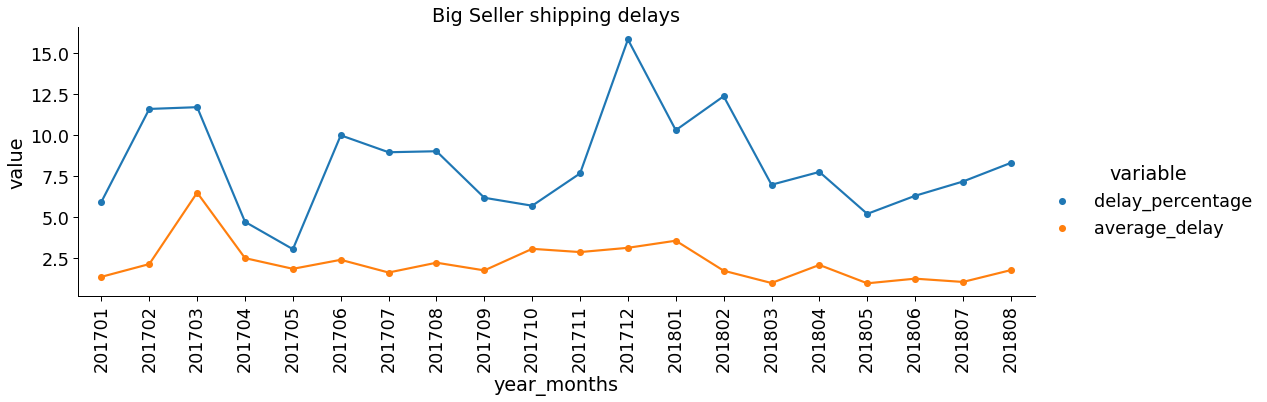

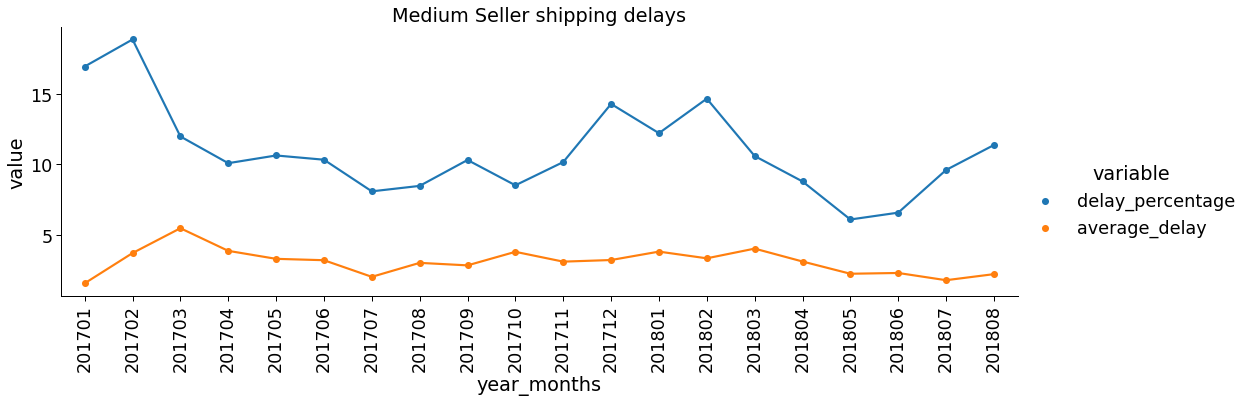

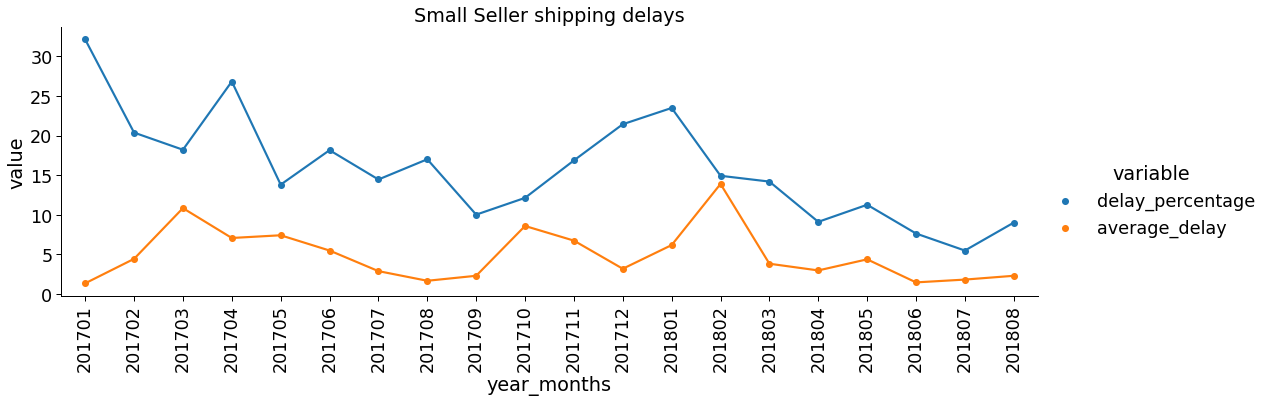

In [27]:
# Plotting shipping delay information for each seller classification

fig1 = sns.catplot(data=big_seller_by_yearmonth, x='year_months', y='value', hue='variable', kind='point', aspect=3, ci=None)
fig2 = sns.catplot(data=medium_seller_by_yearmonth, x='year_months', y='value', hue='variable', kind='point', aspect=3, ci=None)
fig3 = sns.catplot(data=small_seller_by_yearmonth, x='year_months', y='value', hue='variable', kind='point', aspect=3, ci=None)

fig1.ax.set_title("Big Seller shipping delays")
fig2.ax.set_title("Medium Seller shipping delays")
fig3.ax.set_title("Small Seller shipping delays")
fig1.set_xticklabels(rotation=90)
fig2.set_xticklabels(rotation=90)
fig3.set_xticklabels(rotation=90)
plt.show()

It is observable that all seller classifications had an increase in shipments delayed on the period between 2017-12 and 2018-02.
Although small sellers demonstrated a reduction tendency in their order delays, they still take the highest time to ship orders with delay.
Also, this average delay on small sellers oscillated a lot alongside the observed period.

Comparing Big and Medium sellers, both have similar average delay but medium sellers showed less volatile behavior since their numbers variated less 
during the observed period.

To finalize this analysis, let's extract delivery information and summarize the performance of the platform and their seller partners.

# 4. How many orders were delivered with delay?

Since there is no information about the carriers responsible for each delivery, we cannot assess their individual performance.
This way, we will limit the analysis to point out important statistics such as:
* Average delivery time;
* Average delivery delay (days past delivery limit);
* Delivery delay by state (state of order origin);
* The impact of seller and buyer being of different states in those statistics;

#### Average delivery time and Average delivery delay

Let's present delivery delay evolution during the observed period.

Since we are going to explore delivery statistics, we need to consider as reference date the "order_delivered_customer_date" data.
If we use "order_delivered_carrier_date" or even "order_purchase_timestamp" we will encounter orders that don't have a delivery date information
(orders with status of shipped or cancelled).

This information is important and needs to be assessed with stakeholders before beginning any analysis because the numbers may diverge from other analysis
that need to use a different date as base(like income analysis that use date of payment as reference or marketing analysis using purchase timestamp to
analyze sales on a specific marketing campaign period and etc) and sometimes those divergences may cause noise on meetings and even invalidate the report results until a proper explanation is given.

We will use the following constraints for the delivery analysis:
* Use "order_delivered_customer_date" as date reference for data aggregation
* consider only orders with "order_delivered_customer_date" filled (not null or blank)
* consider only orders delivered to customers between '2017-01-01 00:00:00' and '2018-08-31 23:59:59'
* consider only orders  with "order_status" = delivered

In [28]:
# Fetching the order delivery delay data aggregated by year-month

period = ('2017-01-01 00:00:00', '2018-08-31 23:59:59')

# Loading the query
with open("2-Queries/1-Shipment_and_delivery/delivery_delay_statistics_by_year_month.sql") as query:
    order_delivery_data= pd.read_sql_query(query.read(), params=period, con=connection)
order_delivery_data

/home/hbeltrao/Hugo/py_environments/data_env/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,year_months,delivered_on_schedule,delivered_with_delay,total_deliveries,delay_percentage,Average_Delay,average_order_lifetime,average_delivery_duration
0,201701,326.0,0.0,326,0.00,NaN,8.545,5.886
1,201702,1562.0,3.0,1565,0.19,1.169,10.452,7.482
2,201703,2654.0,70.0,2724,2.57,7.300,11.874,8.546
3,201704,1946.0,126.0,2072,6.08,9.323,13.032,9.573
4,201705,3961.0,240.0,4201,5.71,7.579,12.892,9.456
5,201706,3511.0,129.0,3640,3.54,9.465,11.657,8.588
6,201707,3782.0,151.0,3933,3.84,7.801,11.260,8.108
7,201708,4772.0,128.0,4900,2.61,9.116,10.795,7.658
8,201709,4309.0,187.0,4496,4.16,27.060,12.308,9.151
9,201710,4965.0,250.0,5215,4.79,7.384,11.674,8.359


In [29]:
order_delivery_data_pivoted = pd.melt(order_delivery_data, id_vars='year_months', value_vars=["delay_percentage", "Average_Delay", "average_order_lifetime", "average_delivery_duration"])

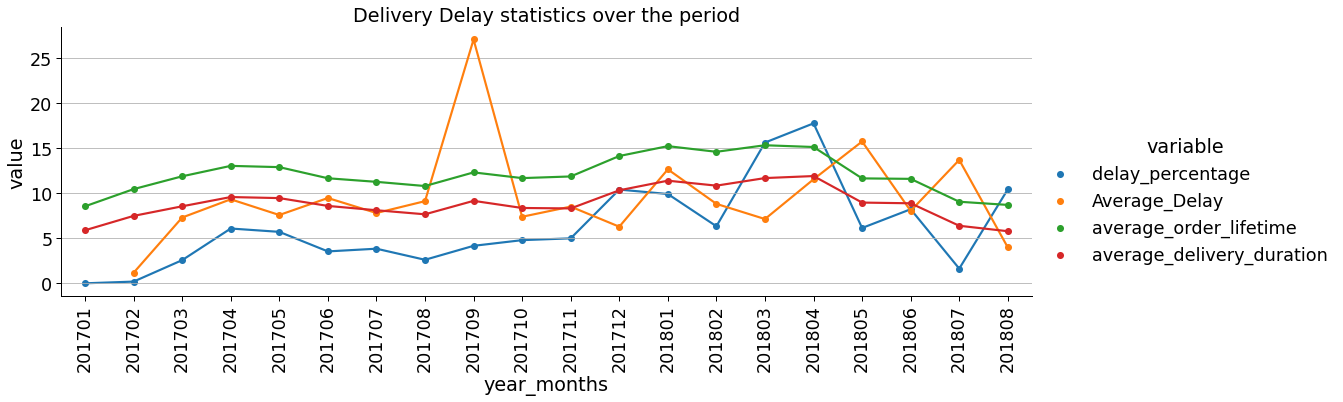

In [31]:
sns.catplot(data=order_delivery_data_pivoted, x='year_months', y='value', hue='variable', kind='point', aspect=3, ci=None)

plt.xticks(rotation=90)
plt.grid(axis='y')
plt.title('Delivery Delay statistics over the period')
plt.show()

Breaking the graphic in 2 parts, first we have a delivery duration with a slightly tendency of increase followed by a reduction tendency, fluctuating most of the time between 5 and 10 days. 
Second, the delay percentage also shows a tendency of increase in 2017 but followed by a strong fluctuation in 2018.

Finally, there is an abnormally high delay in 2017-09 that need to be inspected and validated, wich we will do first before get back to analyze the delay percentage fluctuation.

In [32]:
# extracting the data from 2017-09 to investigate the high delay

# Loading the query
with open("2-Queries/1-Shipment_and_delivery/order_delivered_in_2017-09.sql") as query:
    order_delivered_september_2017= pd.read_sql_query(query.read(), con=connection)
order_delivered_september_2017

/home/hbeltrao/Hugo/py_environments/data_env/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay
0,ca07593549f1816d26a572e06dc1eab6,delivered,2017-02-21 23:31:27,2017-02-23 02:35:15,2017-03-08 13:47:46,2017-09-19 14:36:39,2017-03-22 00:00:00,181.6083
1,2fe324febf907e3ea3f2aa9650869fa5,delivered,2017-03-13 20:17:10,2017-03-13 20:17:10,2017-03-17 07:23:53,2017-09-19 17:00:07,2017-04-05 00:00:00,167.7083
2,285ab9426d6982034523a855f55a885e,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,2017-09-19 14:00:04,2017-04-06 00:00:00,166.5833
3,440d0d17af552815d15a9e41abe49359,delivered,2017-03-07 23:59:51,2017-03-09 01:11:33,2017-03-15 13:00:08,2017-09-19 15:12:50,2017-04-07 00:00:00,165.6333
4,c27815f7e3dd0b926b58552628481575,delivered,2017-03-15 23:23:17,2017-03-15 23:23:17,2017-03-21 14:50:25,2017-09-19 17:14:25,2017-04-10 00:00:00,162.7181
...,...,...,...,...,...,...,...,...
170,3cba655faae78feacf27f20900c776e0,delivered,2017-09-06 20:10:17,2017-09-06 20:25:11,2017-09-12 19:12:55,2017-09-26 17:05:08,2017-09-26 00:00:00,0.7118
171,43f1558f9eec3596990432207c65c146,delivered,2017-08-28 20:03:11,2017-08-29 04:35:50,2017-08-30 19:42:06,2017-09-08 16:25:57,2017-09-08 00:00:00,0.6840
172,91575acf2a356af85894e1c3b1612e81,delivered,2017-09-06 13:07:48,2017-09-06 13:24:07,2017-09-12 13:21:23,2017-09-29 13:46:06,2017-09-29 00:00:00,0.5736
173,9413addabc2268ea995d4e968a185ab3,delivered,2017-08-14 19:45:18,2017-08-16 03:30:17,2017-08-18 15:34:43,2017-09-05 12:55:24,2017-09-05 00:00:00,0.5382


Exploring the data from September we can see that there are 48 entries with over 15 days of delay on delivery and even 21 orders with over 100 days of delay.

Analyzing those 21 entries and validating the calculations manually, the calculations proceed and all 21 orders have all information fields filled, indicating they are regular orders with no apparent error in the columns (like purchase timestamp older than delivery date and etc)
Unfortunately, there are no extra data to be used for us to understand better the reasons behind this behavior.

In [33]:
# Fetching the order delivery data aggregated by state

period = ('2017-01-01 00:00:00', '2018-08-31 23:59:59')

# Loading the query
with open("2-Queries/1-Shipment_and_delivery/delivery_delay_statistics_per_state.sql") as query:
    order_delivery_data_by_state= pd.read_sql_query(query.read(), params=period, con=connection)

/home/hbeltrao/Hugo/py_environments/data_env/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [34]:
# Transforming the data into long format to facilitate plotting with seaborn
order_delivery_data_by_state_pivoted = pd.melt(order_delivery_data_by_state, id_vars='state', value_vars=['average_delay', 'average_delivery_time', 'average_delivery_estimate'])

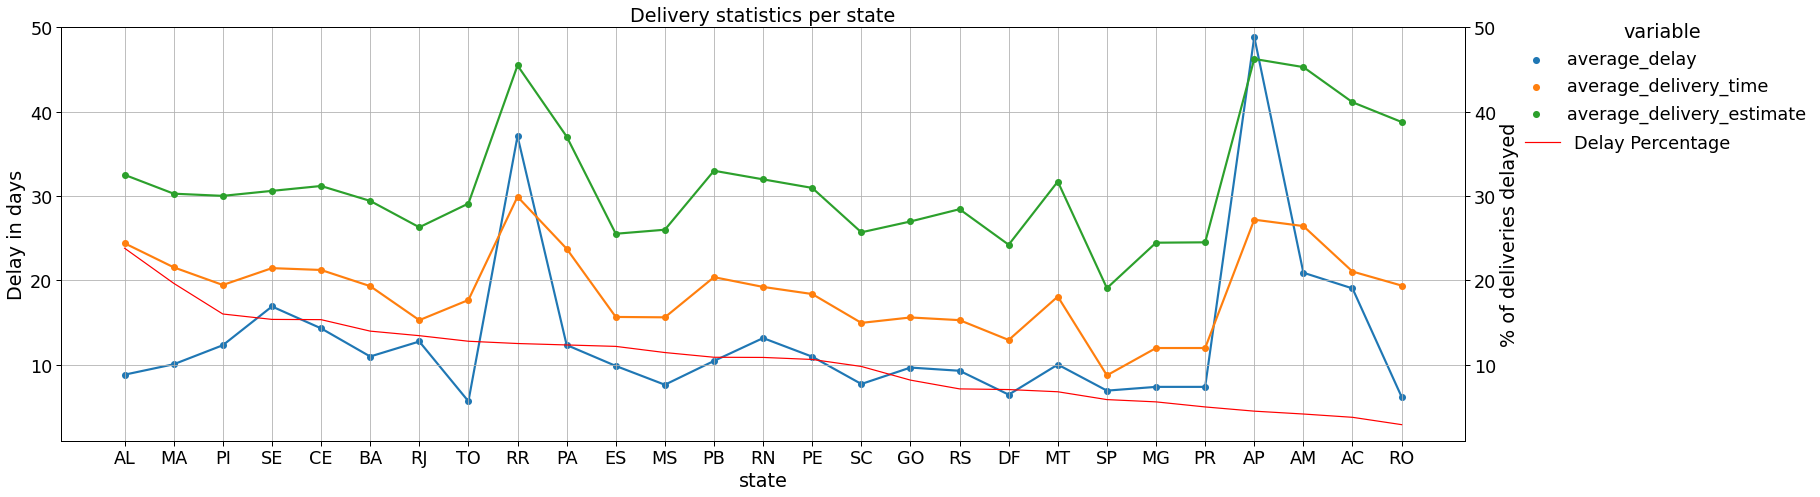

In [36]:
# Creating the plot of delivery delay per state
sns.set_context('paper', font_scale=2)

ax1 = sns.catplot(data=order_delivery_data_by_state_pivoted, x='state', y='value', hue='variable', kind='point', height=7, aspect=3)
ax2=ax1.ax.twinx()
sns.lineplot(data=order_delivery_data_by_state, x='state', y='delivery_delay_percentage', color='red', ax=ax2, label='Delay Percentage')

ax2.set_ylim(1, 50)
ax1.ax.set_ylim(1,50)

ax1.ax.set_xlabel('state')
ax1.ax.set_ylabel('Delay in days')
ax2.set_ylabel('% of deliveries delayed')
plt.title('Delivery statistics per state')

# Adjusting legend box position
sns.move_legend(ax1, 'upper right', bbox_to_anchor=(1.02, 1))
sns.move_legend(ax2, 'upper right', bbox_to_anchor=(1.2, 0.78), frameon=False)

plt.grid()
plt.show()

Delivery statistics shows the highest delivery times are concentrated mostly on the northern region (wich makes sense as north is the most remote region of Brazil and most sellers are concentrated in the southeast region) followed by the northeast region.

Looking into delay information, northeast states have higher percentage of orders delivered after the deadline. Interesting point on delay is that most north region have the lowest percentage of delivery delay even having the worst logistics conditions (bad roads, huge distances, most logistics are made by plane or boat). This way, the common conclusion that "delivering orders to distant or difficult access places tend to delay more often" diverge from the data we have.

For the average delay (time past deadline for delayed deliveries), AP, RR, AM and AC have the highest numbers (they are also the most remote states of the country). This could be related to distance or difficult access but we don't have enough carrier and delivery data to test this hypotesis.

# 5. How shipping delay impacts delivery performance?

Let's see if missing shipment deadlines also increases delivery delays. For that, let's compare the percentage of delivery delay of orders shipped with and without delay.

In [39]:
# Fetching the order delivery data aggregated by year_month and with shipping delay flag

period = ('2017-01-01 00:00:00', '2018-08-31 23:59:59')

# Loading the query
with open("2-Queries/1-Shipment_and_delivery/Ship_and_delivery_status.sql") as query:
    delivery_percentage_with_shipment_status= pd.read_sql_query(query.read(), params=period, con=connection)

/home/hbeltrao/Hugo/py_environments/data_env/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


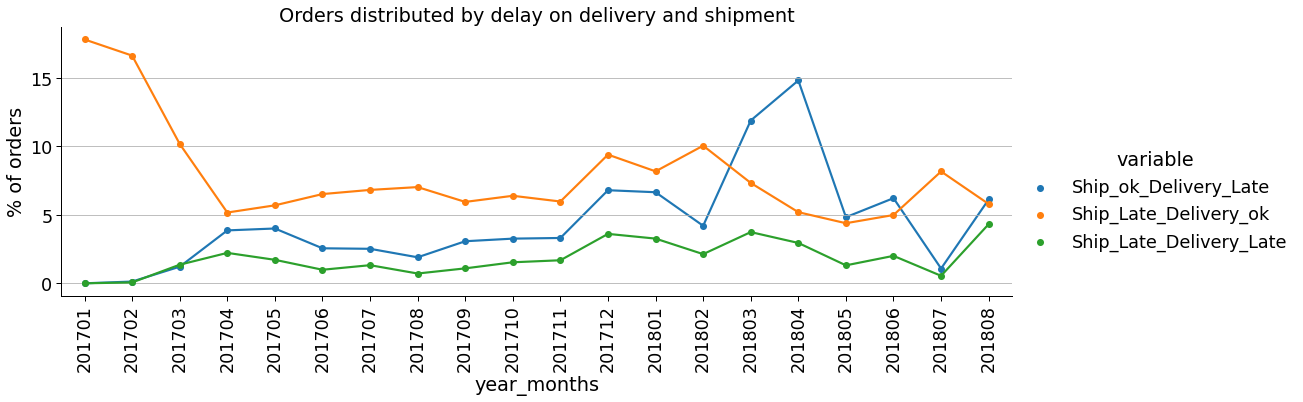

In [40]:
delivery_percentage_with_shipment_status_pivoted = pd.melt(delivery_percentage_with_shipment_status, id_vars='year_months', value_vars=["Ship_ok_Delivery_Late", "Ship_Late_Delivery_ok", "Ship_Late_Delivery_Late"])

sns.catplot(data=delivery_percentage_with_shipment_status_pivoted, x='year_months', y='value', hue='variable', kind='point', aspect=3, ci=None)

plt.xticks(rotation=90)
plt.ylabel('% of orders')
plt.title('Orders distributed by delay on delivery and shipment')
plt.grid(axis='y')
plt.show()

# 6. Is there any relation between delivery delay and the distance between seller and customer?

To answer this question, a few key data are needed:
*   Buyer and seller location (present on  this dataset)
*   Timestamp for shipping and delivery (also present)
*   descriptive data for each delivery such as transport type, presence of incidents, processing times in border crossing etc. (none of this data is available)

Since we don't have any information on delivery process and its possible problems, making an unbiased analysis becomes complex.

Over 90% of sellers are concentrated on southeast and south regions, this way, states from those regions should have the lowest numbers of delay but in fact, the delivery delay is fairly linear through states from southeast, south and northeast. This alone doesn't disprove the hypothesis.

Delay percentage also should be higher on remote regions but the north region possess the lowest percentage of orders delivered after deadlines. Wich also conflicts with the hypothesis but is not enough to disprove it.

So, having conflicting information from delivery delay percentage and delay duration indicates that is not possible to have an accurate conclusion without looking into extra data.

# 7. How does freight value behaves among states?

Let's finalize this analysis by looking into freight distribution. The most direct approach would be calculating the average freight for each origin-destination pair. We will create an interactive panel to show this information filtered per state.

Let's show the average freight value a customer would pay depending on the state he/she lives:

In [41]:
# Fetching the freight information aggregated by buyer state

period = ('2017-01-01 00:00:00', '2018-08-31 23:59:59')

# Loading the query
with open("2-Queries/1-Shipment_and_delivery/freight_value_per_buyer_state.sql") as query:
    freight_value_per_buyer_state= pd.read_sql_query(query.read(), params=period, con=connection)
freight_value_per_buyer_state

/home/hbeltrao/Hugo/py_environments/data_env/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,customer_state,avg_freight,tot_orders
0,RR,44.101458,48
1,PB,42.853708,596
2,RO,41.330549,273
3,AC,40.073370,92
4,PI,39.044586,532
5,MA,38.371272,810
6,TO,37.307962,314
7,SE,36.823753,381
8,AL,35.940253,435
9,PA,35.883761,1069


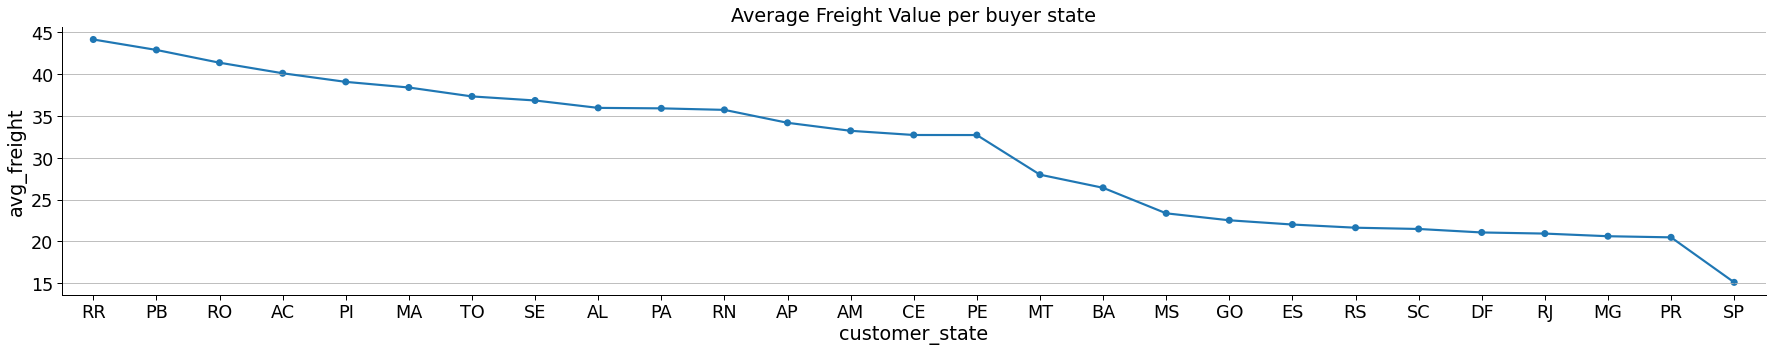

In [45]:
# Plotting freight value distribution by state
sns.catplot(data=freight_value_per_buyer_state, x='customer_state', y='avg_freight', ci=None, kind='point', aspect=5)

plt.title("Average Freight Value per buyer state")
plt.grid(axis='y')

plt.show()

Looking to the graph, there is a significant difference between freight value from southeast and south states compared to the north and northeast states.
Since most sellers are from south and southeast, this result make sense.

# 7. Conclusions

Summarising  the key information  extracted  in the  analysis  we  have:  
  
*  The increase  in  sales  on the  platform  didn't cause an  increase  in  delay  of orders  shipments;  
*  Although  shipment  time  estimate have  decreased  alongside the  period, the real  shipment  time  didn't  followed  this  evolution;  
*  Orders of northeast  customers  tend to  miss  shipping  deadlines more often than  orders  of  customers  from other  regions:  

	* In general, orders  take, on average, the same amount of time to be shipped independently of the customer region;

	* To  avoid  bias in conclusions regarding shipping  prioritization, further analysis is needed such as verifying other prioritization  variables like order  value, quantity of order items, freight value  etc; 
	
* Small  sellers  tend to  lose  shipment  dedline  more often and the  time  after the  deadline  also is longer for  small  sellers;  
* Shipping  late doesn't reflect in  an  increase  on delivery delay;  
* The conflict  on existing  data  and  lack  of  extra  data  about delivery delay and  distance  between  seller  and  buyer unfeasibling unbiased analysis and  conclusion;
* Freight  is cheaper for south and southeast buyers;